In [11]:
import qutip as qt
import numpy as np
import matplotlib.pyplot as plt
from quantum_logical.channel import AmplitudeDamping, PhaseDamping
from quantum_logical.trotter import TrotterGroup
from quantum_logical.interaction import ConversionGainInteraction
from tqdm import tqdm
from quantum_logical.creating_operators import Creating_operators
from quantum_logical.operators import selective_destroy
from scipy.optimize import curve_fit

In [12]:
# generating parameters and creating initial state
T1 = 40
T2 = 8
N = 3
dim = 2
trotter_dt = .02
psi0 = qt.tensor(qt.basis(dim, 1), qt.basis(dim, 0), qt.basis(dim, 0))
rho0 = psi0 * psi0.dag()
amp_damp_channel = AmplitudeDamping(T1, num_qubits=N, hilbert_space_dim=dim)
phase_damp_channel = PhaseDamping(T1, T2, num_qubits=N, hilbert_space_dim=dim)
trotter = TrotterGroup(
    continuous_operators=[amp_damp_channel, phase_damp_channel],
    trotter_dt=trotter_dt,
)


qt.Qobj(amp_damp_channel._create_single_qubit_operators(T1=1)[1])
rho0

Quantum object: dims=[[2, 2, 2], [2, 2, 2]], shape=(8, 8), type='oper', dtype=Dense, isherm=True
Qobj data =
[[0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]]

In [13]:
dur = 1000
rho_delay = trotter.apply(state=rho0, duration=dur, discrete_unitary=qt.qeye(dim ** N))
rho_delay[-1]

Quantum object: dims=[[2, 2, 2], [2, 2, 2]], shape=(8, 8), type='oper', dtype=Dense, isherm=True
Qobj data =
[[9.99759296e-01 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  2.40703536e-04 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00

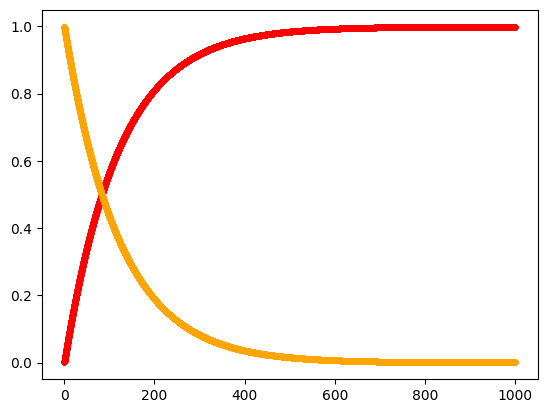

In [18]:
# data gathering for plot generation
ggg = []
egg = []
values = []
for i in rho_delay:
    ggg.append(i[0, 0])
    egg.append(i[4, 4])

time = np.linspace(0, dur, len(rho_delay))

fig, ax = plt.subplots()
ax.plot(time, ggg, marker = '.', color = "r")
ax.plot(time, egg, marker = '.', color = "orange")

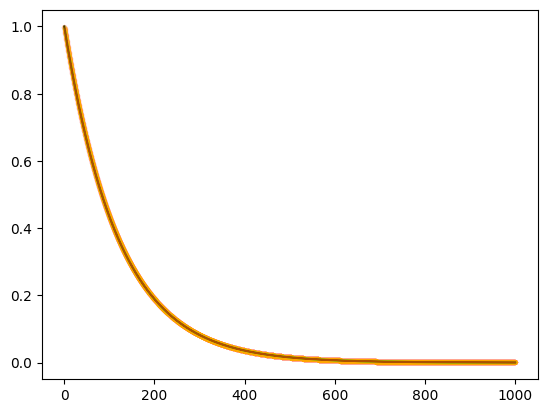

In [19]:
# decay from eg to gg best fit
def function_fit(t, b):
    return np.exp(-t / b)

parameters, covariance = curve_fit(function_fit, time, egg)

# plotting best fit line and superimpose it on eg as a function of time 
fit_func = function_fit(time, parameters[0])
plt.plot(time, fit_func, color = "black", linestyle = "-")
plt.plot(time, egg, color = "orange", marker = ".", alpha = 0.01)


In [16]:
# creating cz gate
CZ = np.zeros((dim ** N, dim ** N))
for i in range(dim ** N):
    for j in range(dim ** N):
        if i == 3 and j == 3:
            CZ[i, j] = -1
        elif i == j:
            CZ[i, j] = 1

CZ = qt.Qobj(CZ)

# creating the two ZZ gates 


In [17]:
# running sim with the cz gate 
dur = 1000
rho_delay = trotter.apply(state=rho0, duration=dur, discrete_unitary=CZ)
rho_delay[-1]


Quantum object: dims=[[2, 2, 2], [2, 2, 2]], shape=(8, 8), type='oper', dtype=Dense, isherm=True
Qobj data =
[[9.99759296e-01 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  2.40703536e-04 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00

c:\Users\girgi\Desktop\Github\quantum_logical\venv\lib\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\girgi\Desktop\Github\quantum_logical\venv\lib\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


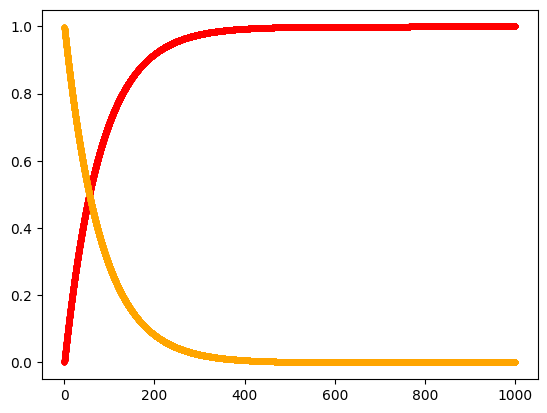

In [20]:
# data gathering for plot generation
gg = []
eg = []
values = []
for i in rho_delay:
    gg.append(i[0, 0])
    eg.append(i[dim, dim])

time = np.linspace(0, dur, len(rho_delay))

fig, ax = plt.subplots()
ax.plot(time, gg, marker = '.', color = "r")
ax.plot(time, eg, marker = '.', color = "orange")